In [497]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names

In [498]:
# get the col reference table
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
# df_ref.head()

In [499]:
# get the data frame giving the list of IDEHRs who have passed
get_file_names(['IDEHR', 'EHRType', 'IDDecesso'], df_ref)

['wH_DirectTable_C_Decesso', 'wH_DirectTable_Decesso']

In [500]:
# get the data frame giving the list of IDEHRs with the start date of hospitalization
get_file_names(['IDEHR', 'EHRType', 'TimeStamp_Insert'], df_ref)

['wH_DirectTable_CR_SCALE_PPI',
 'wH_DirectTable_C_DIAGNOSI_CROSSOU',
 'wH_DirectTable_C_DOLORE_OSS_VIDAS',
 'wH_DirectTable_R_RISCHIO_LESIONI',
 'wH_DirectTable_C_FOLLW_UP_ASS',
 'wH_DirectTable_Decesso',
 'wH_DirectTable_C__S_VMD_FLUSSI_',
 'wH_DirectTable_C_PI',
 'wH_DirectTable_C_Studio_NEVI_',
 'wH_Stats_CC_EHR_OpenLog',
 'wH_DirectTable_VISITA_INF_VIDAS',
 'wH_DirectTable_Scala_AT',
 'wH_DirectTable_PI',
 'wH_DirectTable_C_ANAMNESI_INF',
 'wH_DirectTable_C_Dati_Integrativi_SDO',
 'wH_DirectTable_ASSOC_ON_FUNEBRI',
 'wH_DirectTable_DAT',
 'wH_DirectTable_ANAMNESI_SOCIALE',
 'wH_DirectTable_XX_VISITA_INF_VIDAS',
 'wH_DirectTable_C_Scala_AT',
 'wH_DirectTable_DIAGNOSI_ICD',
 'wH_DirectTable_C_Scala_di_Barthel',
 'wH_DirectTable_C_BCP_specialistica',
 'wH_DirectTable_C_Telefonata',
 'wH_Stats_EHR_DT_PrintLog',
 'wH_DirectTable_C_Scala_ESAS',
 'wH_DirectTable_C_Decesso',
 'wH_DirectTable_DIAGNOSI_CROSSOU',
 'wH_DirectTable_Telefonata',
 'wH_DirectTable_LESIONI_MED_e_INF_VI',
 'wH_Dire

In [501]:
# get the data frame giving the list of IDEHRs with the diagnosis
get_file_names(['IDEHR', 'EHRType', 'IDDIAGNOSI_ICD'], df_ref)

['wH_DirectTable_C_DIAGNOSI_ICD', 'wH_DirectTable_DIAGNOSI_ICD']

In [502]:
# data frame with deathID
df_death = pd.read_csv('./vidas_data/wH_DirectTable_Decesso.csv', parse_dates=['Data'])
df_death = df_death[['IDEHR', 'Data', 'EHRType']].drop_duplicates(subset=['IDEHR', 'EHRType'], keep='first')
print(df_death.shape)
df_death.head()

(6056, 3)


,IDEHR,Data,EHRType
0,4,2015-01-09 16:15:00,EHR
1,1022,2015-01-11 00:15:00,EHR
2,16,2015-01-15 01:45:00,EHR
3,1025,2015-01-15 06:44:00,EHR
4,6,2015-01-20 14:50:00,EHR


In [503]:
# check NaNs
df_death.isna().sum()

IDEHR       0
Data       54
EHRType     0
dtype: int64

In [504]:
# data frame with start of hospitalization
# df_soh = pd.read_csv('./vidas_data/wH_DigitalSign_DigSigDoc.csv', parse_dates=['TimeStamp_Insert'])
# using the earliest timestamp for an IDEHR+EHRType from all tables
df_soh = pd.read_csv('./vidas_data/start_time.csv', parse_dates=['TimeStamp_Insert'])
print(df_soh.shape)
df_soh = df_soh[['IDEHR', 'EHRType', 'TimeStamp_Insert']].drop_duplicates(subset=['IDEHR', 'EHRType'], keep='first')
print(df_soh.shape)
df_soh.head()

(20671, 3)
(20671, 3)


,IDEHR,EHRType,TimeStamp_Insert
0,10,AMB,2015-01-13 15:04:16.330
1,13,AMB,2015-01-13 15:07:17.303
2,19,AMB,2015-01-13 11:48:38.683
3,22,AMB,2015-01-05 11:53:12.503
4,25,AMB,2015-01-13 11:51:36.037


In [505]:
# check NaNs
df_soh.isna().sum()

IDEHR               0
EHRType             0
TimeStamp_Insert    0
dtype: int64

In [506]:
# data frame with diagnosis
df_diag = pd.read_csv('./vidas_data/wH_DirectTable_DIAGNOSI_ICD.csv')
df_diag = df_diag[['IDEHR', 'I_ICD', 'EHRType']].drop_duplicates(subset=['IDEHR', 'EHRType'], keep='first').dropna()
print(df_diag.shape)
df_diag.head()

(8388, 3)


C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (23,24,42,43,44,62,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,IDEHR,I_ICD,EHRType
0,3339,1629 - Tumori maligni del bronco o polmone - ...,AMB
2,3170,1749 - Tumori maligni della mammella (della do...,AMB
3,2885,1428 - Tumori maligni di altre ghiandole saliv...,AMB
4,3017,1749 - Tumori maligni della mammella (della do...,AMB
5,3297,1629 - Tumori maligni del bronco o polmone - ...,AMB


In [507]:
# check NaNs
df_diag.isna().sum()

IDEHR      0
I_ICD      0
EHRType    0
dtype: int64

In [508]:
df_diag = df_diag.dropna()
print(df_diag.shape)
df_diag.isna().sum()

(8388, 3)


IDEHR      0
I_ICD      0
EHRType    0
dtype: int64

In [509]:
# df_diag.diagnosi.value_counts()

In [510]:
# generate date span in df_death for IDEHRs 
df_ds = pd.read_csv('./vidas_data/wH_DirectTable_Decesso.csv', parse_dates=['Data'])
df_ds = df_ds[['IDEHR', 'Data', 'EHRType']].sort_values(by=['IDEHR', 'Data'], ascending=[True, True]).reset_index(drop=True)
df_ds.head()

,IDEHR,Data,EHRType
0,2,2015-02-22 03:00:00,EHR
1,4,2015-01-09 16:15:00,EHR
2,6,2015-01-20 14:50:00,EHR
3,7,2015-03-12 14:45:00,EHR
4,8,2015-02-25 06:12:00,EHR


In [511]:
df_ds1 = df_ds.drop_duplicates(['IDEHR', 'EHRType'], keep='first')
df_ds2 = df_ds.drop_duplicates(['IDEHR', 'EHRType'], keep='last')
date_span = pd.to_timedelta(df_ds2.Data - df_ds1.Data).dt.days
date_span.value_counts()

0.0    5633
Name: Data, dtype: int64

In [512]:
df_ds.IDEHR.value_counts()

5914     6
28042    6
27772    6
17291    5
25174    4
        ..
5376     1
7425     1
23575    1
21764    1
8192     1
Name: IDEHR, Length: 5935, dtype: int64

In [513]:
# an example of repeated entries
df_ds.loc[df_ds['IDEHR'] == 25174]

,IDEHR,Data,EHRType
5786,25174,2020-04-26 15:55:03,AMB
5787,25174,2020-04-26 15:55:24,AMB
5788,25174,2020-04-26 15:55:26,AMB
5789,25174,2020-04-26 15:55:48,AMB


In [514]:
# do the merge
from functools import reduce
dfs = [df_death, df_soh, df_diag]
df_referral = reduce(lambda left, right: pd.merge(left, right, on=['IDEHR', 'EHRType']), dfs)

In [515]:
df_referral

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048
1,2904,NaT,AMB,2015-09-04 14:53:01.400,1550 - Tumori maligni primitivi del fegato#2048
2,1414,2015-10-05 11:50:00,EHR,2015-10-02 15:45:06.800,28983 - Mielofibrosi#2615
3,3339,NaT,AMB,2015-09-23 15:11:20.817,1629 - Tumori maligni del bronco o polmone - ...
4,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...
...,...,...,...,...,...
5648,5281,2020-07-23 09:55:00,EHR,2020-07-17 12:36:37.000,1500 - Tumori maligni dell'esofago cervicale#2...
5649,27907,2020-07-23 11:00:00,AMB,2020-04-23 14:31:49.963,"1629 - Tumori maligni del bronco o polmone, no..."
5650,28540,2020-07-23 01:45:22,AMB,2020-05-25 18:06:40.197,1536 - Tumori maligni del colon ascendente#2039
5651,29440,2020-07-23 15:36:43,AMB,2020-07-20 17:23:52.570,"1629 - Tumori maligni del bronco o polmone, no..."


In [516]:
# get the survival time (in days) for each patient
df_referral['survival_time_days'] = pd.to_timedelta(df_referral['Data'] - df_referral['TimeStamp_Insert']).dt.days
df_referral.head()

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048,10.0
1,2904,NaT,AMB,2015-09-04 14:53:01.400,1550 - Tumori maligni primitivi del fegato#2048,NaN
2,1414,2015-10-05 11:50:00,EHR,2015-10-02 15:45:06.800,28983 - Mielofibrosi#2615,2.0
3,3339,NaT,AMB,2015-09-23 15:11:20.817,1629 - Tumori maligni del bronco o polmone - ...,NaN
4,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...,10.0


In [517]:
print(df_referral.shape)
df_referral.survival_time_days.value_counts()

(5653, 6)


3.0       253
2.0       251
5.0       250
1.0       236
4.0       228
         ... 
210.0       1
1416.0      1
442.0       1
532.0       1
223.0       1
Name: survival_time_days, Length: 307, dtype: int64

In [518]:
print(df_referral.isna().sum())
df_referral = df_referral.dropna()

IDEHR                  0
Data                  53
EHRType                0
TimeStamp_Insert       0
I_ICD                  0
survival_time_days    53
dtype: int64


In [519]:
# translate the diagnosis to English
# from googletrans import Translator
# df_referral['Diagnosis'] = df_referral.Diagnosi.str.findall('(.+)#').to_frame()
# df_referral['Diagnosis'] = df_referral['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])

# translator = Translator()
# df_referral['Diagnosi'] = df_referral['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# df_referral = df_referral.drop(columns = ['Diagnosis'])
# df_referral.head()

In [520]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_width()
        ax.annotate('{}'.format(height),
                    xy=(height, rect.get_y()),
                    xytext=(30, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [521]:
with pd.option_context("display.max_rows", 1000):
    print(df_referral.survival_time_days.value_counts())

 3.0       253
 2.0       251
 5.0       250
 1.0       236
 4.0       228
 6.0       201
 8.0       165
 9.0       154
 7.0       150
 11.0      146
 10.0      144
 12.0      125
 0.0       122
 15.0      120
 13.0      113
 14.0      112
 17.0       95
 16.0       90
 19.0       89
 22.0       83
 24.0       83
 18.0       83
 23.0       75
 20.0       71
 26.0       71
 21.0       71
 25.0       66
 28.0       65
 29.0       58
 27.0       56
 31.0       51
 30.0       48
 37.0       43
 34.0       40
 46.0       40
 36.0       40
 38.0       38
 33.0       37
 40.0       37
 39.0       37
 35.0       37
 45.0       37
 32.0       36
 44.0       35
 43.0       32
 47.0       31
 41.0       29
 57.0       28
 50.0       27
 42.0       26
 49.0       25
 51.0       23
 62.0       21
 48.0       20
 56.0       20
 55.0       19
 61.0       19
 79.0       19
 64.0       18
 58.0       18
 59.0       18
 53.0       17
 70.0       16
 52.0       15
 63.0       15
 60.0       14
 66.0     

In [522]:
# print('Mean Survival (using index): ', np.mean(df_referral.survival_time_days.value_counts())) # this just gives the mean of the days (not counting the number of times that day occurs)
# print('Survival Stddev (using index): ', np.std(df_referral.survival_time_days.value_counts().index, ddof=0))
print('Mean Survival: ', np.mean(df_referral.survival_time_days))
print('Survival Stddev: ', np.std(df_referral.survival_time_days, ddof=0))

Mean Survival:  36.21982142857143
Survival Stddev:  66.77263982006056


<Figure size 1440x720 with 0 Axes>

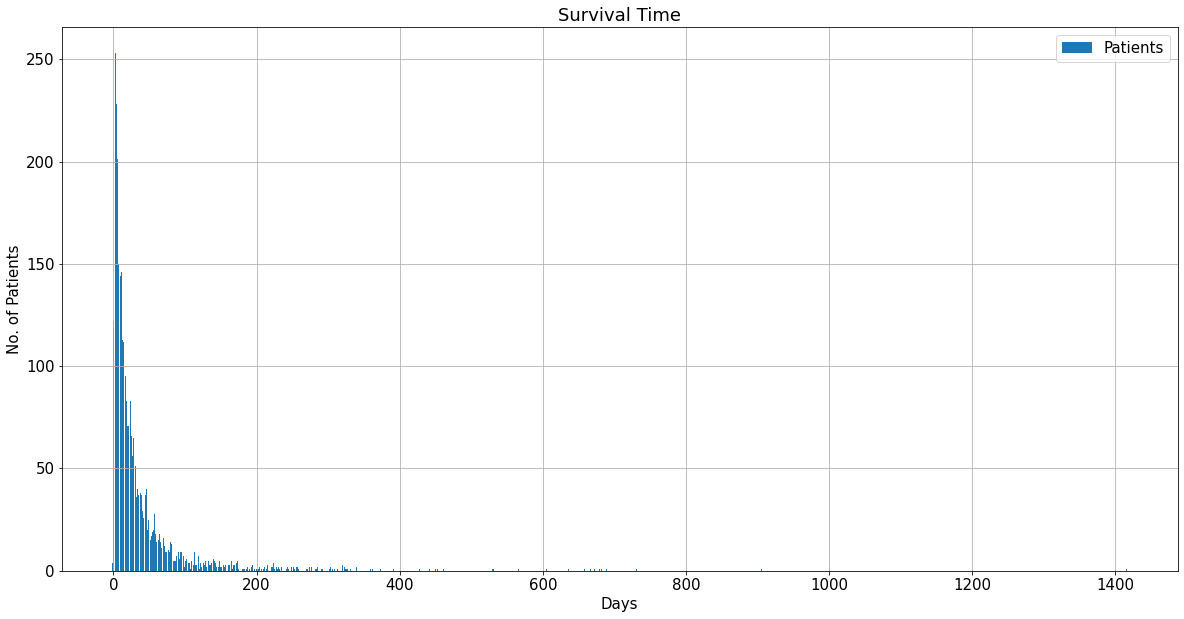

In [523]:
# get the survival time histogram for all patients
plt.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df_referral['survival_time_days'].value_counts().index
survival = df_referral['survival_time_days'].value_counts(normalize=False)
fig, ax = plt.subplots()
bar1 = ax.bar(labels, survival, label='Patients')
ax.set_xlabel('Days')
ax.set_ylabel('No. of Patients')
ax.set_title('Survival Time')
ax.legend()
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time.png")
plt.show()

In [524]:
df_referral.I_ICD.unique()

array(['1550 - Tumori maligni primitivi del fegato#2048',
       '28983 - Mielofibrosi#2615',
       '1629 - Tumori maligni del bronco o polmone -  non specificato#2069',
       '1739 - Altri tumori maligni della cute -  sede non specificata#2568',
       '001 - Cure Palliative#2005',
       '1579 - Tumori maligni del pancreas -  parte non specificata#2062',
       '1625 - Tumori maligni del lobo inferiore -  bronco o polmone#2067',
       '1619 - Tumori maligni della laringe, non specificata#2604=0',
       'V667 - Trattamento per cure palliative#2402=0',
       '1519 - Tumori maligni dello stomaco -  non specificato#2032',
       '1578 - Tumori maligni di altre sedi (specificate) del pancreas#2061',
       '1579 - Tumori maligni del pancreas, parte non specificata#2062=0',
       '1891 - Tumori maligni della pelvi renale#2124',
       '1570 - Tumori maligni della testa del pancreas#2056',
       '20410 - Leucemia linfoide, cronica, senza menzione di remissione#2274=0',
       '1571 -

In [525]:
df_referral.loc[df_referral['IDEHR'] == 1770]

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days
482,1770,2016-04-20 23:15:00,EHR,2016-04-15 11:00:00.400,7101 Sclerosi sistemica#2759=0,5.0


In [526]:
print(df_referral.shape)
df_referral = df_referral.drop([482])
print(df_referral.shape)

(5600, 6)
(5599, 6)


In [527]:
# clean up the diagnosis column
from googletrans import Translator
df_referral['Diagnosis'] = df_referral.I_ICD.str.findall('- (.+)#').to_frame()
df_referral['Diagnosis'] = df_referral['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0]) 
df_referral['Diag_Ref'] = df_referral.I_ICD.str.findall('(\d+) -').to_frame()
df_referral['Diag_Ref'] = df_referral['Diag_Ref'].apply(lambda x: x if isinstance(x, float) else int(x[0]))

In [528]:
df_referral.head()

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days,Diagnosis,Diag_Ref
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048,10.0,Tumori maligni primitivi del fegato,1550
2,1414,2015-10-05 11:50:00,EHR,2015-10-02 15:45:06.800,28983 - Mielofibrosi#2615,2.0,Mielofibrosi,28983
4,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...,10.0,Tumori maligni del bronco o polmone - non spe...,1629
5,3417,2015-10-05 15:00:00,AMB,2015-09-28 17:26:59.413,1739 - Altri tumori maligni della cute - sede...,6.0,Altri tumori maligni della cute - sede non sp...,1739
6,2977,2015-10-06 06:00:00,AMB,2015-09-08 11:26:31.850,001 - Cure Palliative#2005,27.0,Cure Palliative,1


In [529]:
# ref_diag = df_referral[['Diagnosis', 'Diag_Ref']].drop_duplicates()
# ref_diag['Diagnosis'] = ref_diag['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# print(len(ref_diag.Diagnosis.unique()), len(ref_diag.Diag_Ref.unique()))
# ref_diag.head()

In [530]:
# save as csv file for grouping reference
# ref_diag.to_csv('./vidas_data/diagnosis_reference.csv')

In [531]:
# group together similar diag 
liver_biliary = [1550, 1977, 1560, 1569, 1977, 1568, 1561, 1552, 1551]
lung = [1629, 1625, 1624, 1623, 1970, 1628, 1630, 1639, 162, 1638, 2312, 1631, 1011, 1649, 1972, 1622]
skin = [1739, 1728, 1738, 172, 1723, 1737, 1733, 1729, 2324, 1735, 1760]
other = [1, 667, 20340, 436, 51883, 1533, 4289, 1580, 2, 4379, 1562, 40391, 1589, 1639, 7054, 20300, 1534, 5193, 1976, 5859, 4281, 5119, 4280, 1990, 33520, 1928, 1718, 20290, 5716, 667, 7895, 33119, 20301, 4149, 20500, 20530, 2059, 199, 23875, 2040, 5715, 2900, 200, 33182, 4912, 202, 591, 2904, 29043, 586, 425, 2900, 6393, 49122, 1958, 2399, 34839, 5761, 7242, 99, 2308, 71500, 1961, 10, 1872, 1719, 2564, 1640, 51883, 4380, 1768, 2902, 2399, 29021, 4254, 3321, 2012, 1515, 3382, 51881, 515, 29040, 49121, 51884, 1960, 34591, 4011, 1079, 4371, 1452, 29020, 23875, 4918, 4409, 7687, 1009, 2859, 5849, 73300, 768, 109, 2800, 2941, 600, 1303, 7994, 5712, 4299, 3485, 2019, 1052, 29411, 4019, 7854, 5118, 3320, 4169, 4414, 2252, 3352, 431, 28521, 28989, 4150, 7051, 3438, 1991, 4321, 1709, 578, 56089, 7824, 20380, 2002, 20020, 43811, 340, 73301, 19889, 49120, 20121, 2899, 261, 2903, 2001, 3312, 4160, 57140, 20002, 42, 5900, 9985, 42731, 41511, 430, 99591, 1702, 3449, 40493, 20000, 4168, 34830, 3314, 34590, 463, 135, 20191, 1962, 33524, 29041, 2089, 4941, 28529, 5609]
pancreas = [1579, 1578, 1570, 1571, 1572, 157, 1573]
head_neck = [1619, 1488, 1489, 1467, 1450, 1471, 1468, 1409, 1431, 1412, 1460, 1710, 1418, 1420, 1724, 1469, 1419, 1439, 1479, 1421, 1601, 1721, 1441, 1603, 1618, 1610, 1459, 1499, 1411, 1950, 1490, 1459, 1478, 1438]
stomach_esophagus = [1519, 1513, 1518, 1509, 1504, 1514, 1502, 1501, 150, 1004, 1520,  1510, 1508, 1512, 1503, 1500, 1505, 1588, 1589, 1598]
kidney = [1891, 1890, 1892, 1899, 189, 1898]
lymphoid_leukemia = [20410, 20890, 2048, 2041, 20480, 20400, 20600, 20420]
breast = [1740, 1749, 1744, 1749, 1748, 1741, 174, 1742, 1759, 2330, 1743,  1745, 1746, 103]
brain = [1919, 1918, 1917, 1910, 1911, 191, 1912, 1913, 1983, 1929, 1921, 1916]
colorectal = [1539, 1540, 1532, 1541, 1536, 154, 153, 1548, 1543, 1531, 1535, 1975, 1543, 1542]
bladder = [1888, 1889, 188, 1883, 1882, 1884, 2337, 1881, 1899, 1880]
tongue = [1410]
limb = [1726, 1725, 1707, 1727, 1717, 1716, 1713, 1715]
uterus = [179, 1828, 1809, 1820, 1838, 1839]
thyroid = [193]
prostate = [185, 1046, 2334]
bone_marrow = [28983, 1985, 20500]
ovary = [1830, 1986, 1043]
lymphoma = [20208, 20203, 20288, 20021, 20202, 20201, 20280, 20028, 20200, 20280, 20021, 20028, 20025, 20282, 20013, 20204, 20281,  20015, 20286, 20010]
cervical = [1844, 1809, 1840, 2331, 1808, 1801, 1800]
intestine = [1538, 1529, 1590, 1530, 1522, 1590, 1528, 1005]

In [532]:
df_referral['Diagnosis_Flag'] = np.NaN
df_referral.loc[df_referral['Diag_Ref'].isin(liver_biliary), 'Diagnosis'] = 'Liver-Biliary'
df_referral.loc[df_referral['Diag_Ref'].isin(liver_biliary), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(lung), 'Diagnosis'] = 'Lung'
df_referral.loc[df_referral['Diag_Ref'].isin(lung), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(skin), 'Diagnosis'] = 'Skin'
df_referral.loc[df_referral['Diag_Ref'].isin(skin), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(other), 'Diagnosis'] = 'Other'
df_referral.loc[df_referral['Diag_Ref'].isin(other), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(pancreas), 'Diagnosis'] = 'Pancreas'
df_referral.loc[df_referral['Diag_Ref'].isin(pancreas), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(head_neck), 'Diagnosis'] = 'Head-Neck'
df_referral.loc[df_referral['Diag_Ref'].isin(head_neck), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(stomach_esophagus), 'Diagnosis'] = 'Stomach-Esophagus'
df_referral.loc[df_referral['Diag_Ref'].isin(stomach_esophagus), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(kidney), 'Diagnosis'] = 'Kidney'
df_referral.loc[df_referral['Diag_Ref'].isin(kidney), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoid_leukemia), 'Diagnosis'] = 'Lymphoid_Leukemia'
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoid_leukemia), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(breast), 'Diagnosis'] = 'Breast'
df_referral.loc[df_referral['Diag_Ref'].isin(breast), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(brain), 'Diagnosis'] = 'Brain'
df_referral.loc[df_referral['Diag_Ref'].isin(brain), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(colorectal), 'Diagnosis'] = 'Colorectal'
df_referral.loc[df_referral['Diag_Ref'].isin(colorectal), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(bladder), 'Diagnosis'] = 'Bladder'
df_referral.loc[df_referral['Diag_Ref'].isin(bladder), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(tongue), 'Diagnosis'] = 'Tongue'
df_referral.loc[df_referral['Diag_Ref'].isin(tongue), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(limb), 'Diagnosis'] = 'Limb'
df_referral.loc[df_referral['Diag_Ref'].isin(limb), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(uterus), 'Diagnosis'] = 'Uterus'
df_referral.loc[df_referral['Diag_Ref'].isin(uterus), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(thyroid), 'Diagnosis'] = 'Thyroid'
df_referral.loc[df_referral['Diag_Ref'].isin(thyroid), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(prostate), 'Diagnosis'] = 'Prostate'
df_referral.loc[df_referral['Diag_Ref'].isin(prostate), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(bone_marrow), 'Diagnosis'] = 'Bone Marrow'
df_referral.loc[df_referral['Diag_Ref'].isin(bone_marrow), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(ovary), 'Diagnosis'] = 'Ovary'
df_referral.loc[df_referral['Diag_Ref'].isin(ovary), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoma), 'Diagnosis'] = 'Lymphoma'
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoma), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(cervical), 'Diagnosis'] = 'Cervical'
df_referral.loc[df_referral['Diag_Ref'].isin(cervical), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(intestine), 'Diagnosis'] = 'Intestine'
df_referral.loc[df_referral['Diag_Ref'].isin(intestine), 'Diagnosis_Flag'] = True

In [533]:
df_referral.Diagnosis_Flag.value_counts()

True    5460
Name: Diagnosis_Flag, dtype: int64

In [534]:
df_referral.shape

(5599, 9)

In [535]:
df_referral = df_referral[df_referral['Diagnosis_Flag'].notna()]

In [536]:
df_referral.shape

(5460, 9)

In [537]:
df_referral.head()

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days,Diagnosis,Diag_Ref,Diagnosis_Flag
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048,10.0,Liver-Biliary,1550,True
2,1414,2015-10-05 11:50:00,EHR,2015-10-02 15:45:06.800,28983 - Mielofibrosi#2615,2.0,Bone Marrow,28983,True
4,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...,10.0,Lung,1629,True
5,3417,2015-10-05 15:00:00,AMB,2015-09-28 17:26:59.413,1739 - Altri tumori maligni della cute - sede...,6.0,Skin,1739,True
6,2977,2015-10-06 06:00:00,AMB,2015-09-08 11:26:31.850,001 - Cure Palliative#2005,27.0,Other,1,True


In [538]:
df_referral.Diagnosis.value_counts()

Lung                 1046
Other                 967
Pancreas              528
Colorectal            446
Breast                388
Liver-Biliary         382
Stomach-Esophagus     341
Brain                 223
Prostate              197
Bladder               163
Kidney                133
Ovary                 121
Head-Neck             107
Uterus                 76
Lymphoma               67
Limb                   50
Skin                   49
Cervical               46
Bone Marrow            43
Intestine              39
Lymphoid_Leukemia      22
Thyroid                17
Tongue                  9
Name: Diagnosis, dtype: int64

In [539]:
# get the survival time histogram for patients in each diagnosis
df_survival = df_referral[['Diagnosis', 'survival_time_days']].groupby(by=['Diagnosis']).mean()
df_survival_stddev = df_referral[['Diagnosis', 'survival_time_days']].groupby(by=['Diagnosis']).std(ddof=0)

In [540]:
df_survival

,survival_time_days
Diagnosis,
Bladder,35.411043
Bone Marrow,31.441860
Brain,38.883408
Breast,41.814433
Cervical,36.804348
Colorectal,41.385650
Head-Neck,37.700935
Intestine,39.128205
Kidney,45.353383


In [541]:
df_survival_stddev = df_survival_stddev.rename(columns={"survival_time_days": "survival_stddev"})
df_surv = pd.merge(df_survival, df_survival_stddev, on='Diagnosis').reset_index().sort_values(by='survival_time_days', ascending=False).reset_index(drop=True)
df_surv

,Diagnosis,survival_time_days,survival_stddev
0,Lymphoid_Leukemia,53.136364,88.431430
1,Kidney,45.353383,76.736655
2,Limb,45.000000,78.252923
3,Prostate,43.817259,71.664809
4,Uterus,41.973684,88.826705
5,Breast,41.814433,78.327666
6,Colorectal,41.385650,74.915074
7,Intestine,39.128205,40.949737
8,Brain,38.883408,53.716536
9,Head-Neck,37.700935,73.155093


In [542]:
# from googletrans import Translator
# df_surv['Diagnosis'] = df_surv.I_ICD.str.findall('(.+)#').to_frame()
# df_surv['Diagnosis'] = df_surv['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])

# translator = Translator()
# df_surv['I_ICD'] = df_surv['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# df_surv = df_surv.drop(columns = ['Diagnosis']).sort_values(by='survival_time_days', ascending=False)
# df_surv

<Figure size 1440x1296 with 0 Axes>

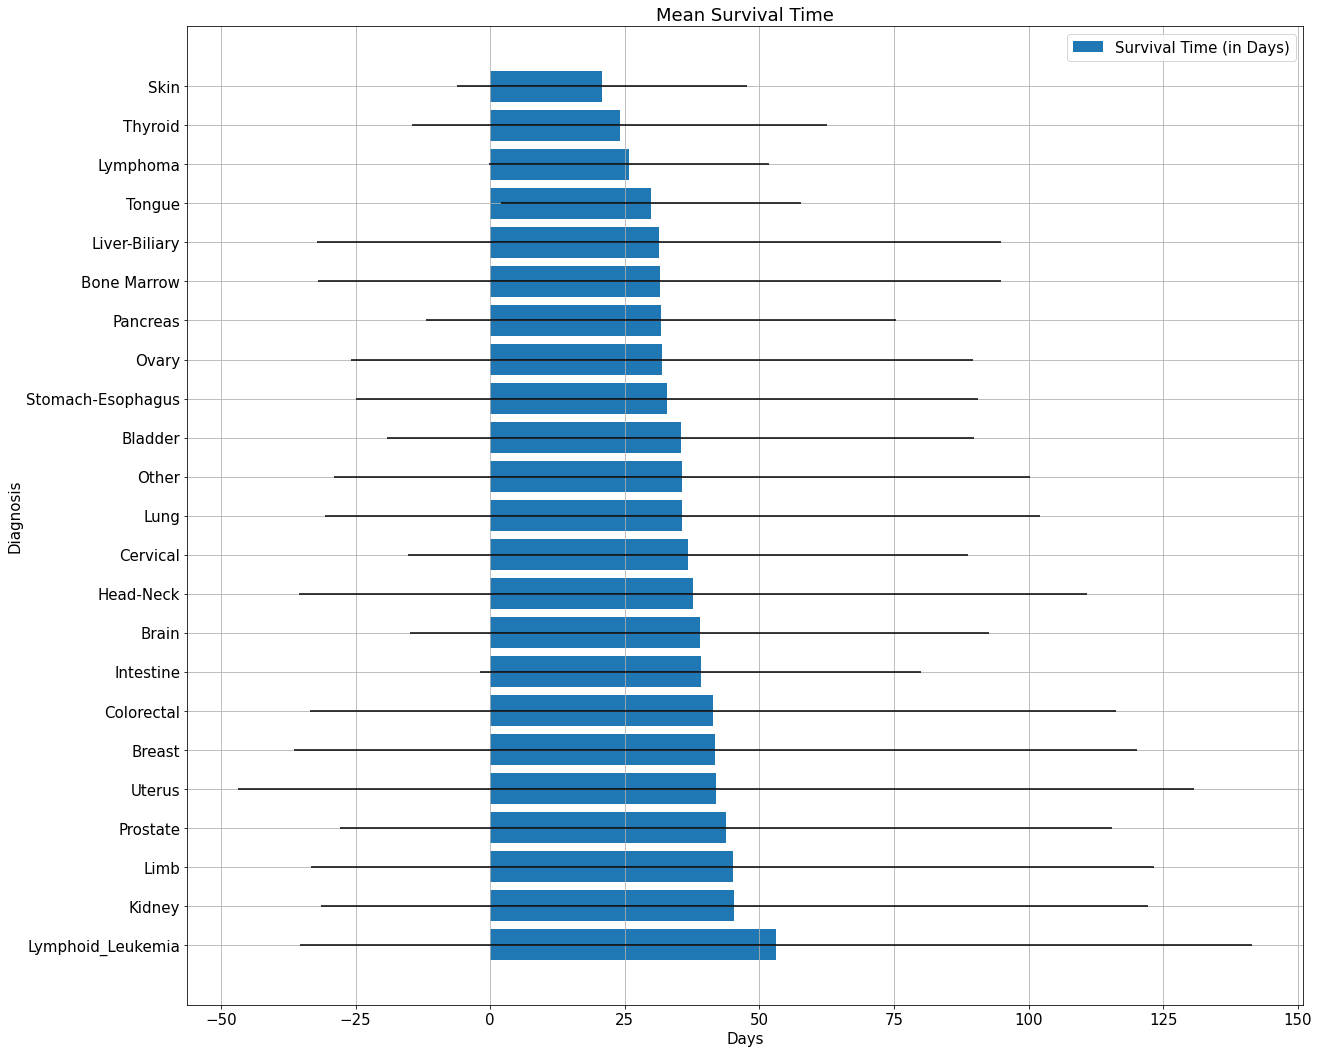

In [543]:
plt.rcParams['figure.figsize'] = [20, 18]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df_surv['Diagnosis']
survival = df_surv['survival_time_days']
errors = df_surv['survival_stddev']
fig, ax = plt.subplots()
bar1 = ax.barh(labels, survival, label='Survival Time (in Days)', xerr=errors)
ax.set_xlabel('Days')
ax.set_ylabel('Diagnosis')
ax.set_title('Mean Survival Time')
ax.legend()
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time_diagnosis.png")
plt.show()

<Figure size 720x720 with 0 Axes>

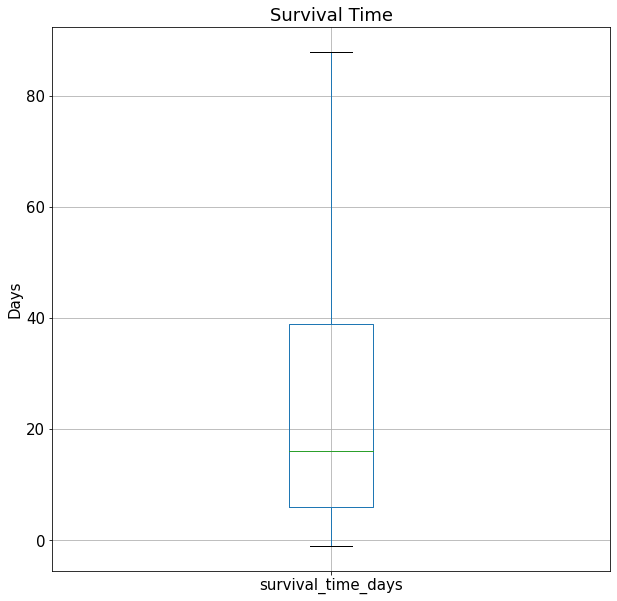

In [544]:
# generate a box and whisker plot
plt.rcParams['figure.figsize'] = [10, 10]
plt.figure()
fig, ax = plt.subplots()
ax.set_ylabel('Days')
ax.set_title('Survival Time')
df_referral.boxplot(column=['survival_time_days'], showfliers=False)

<Figure size 720x720 with 0 Axes>

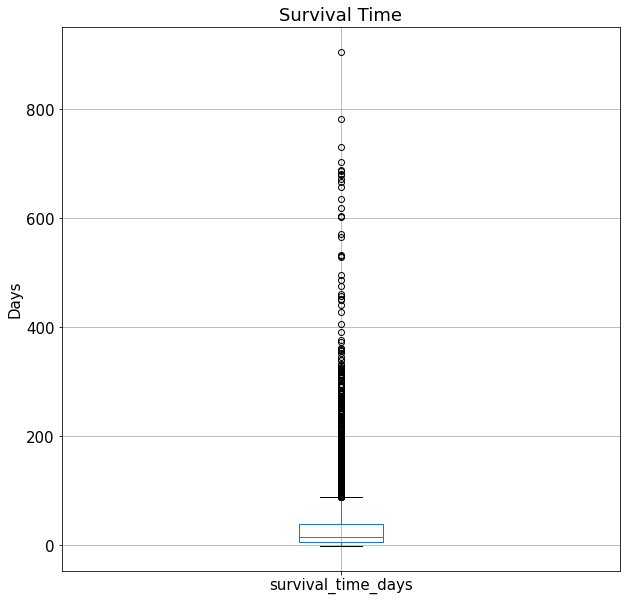

In [545]:
# boxplot with outliers
plt.rcParams['figure.figsize'] = [10, 10]
plt.figure()
fig, ax = plt.subplots()
ax.set_ylabel('Days')
ax.set_title('Survival Time')
df_referral.boxplot(column=['survival_time_days'])

<Figure size 360x360 with 0 Axes>

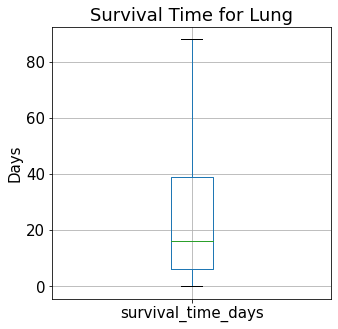

<Figure size 360x360 with 0 Axes>

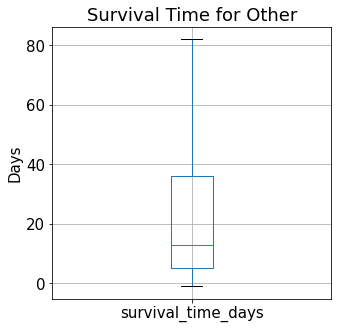

<Figure size 360x360 with 0 Axes>

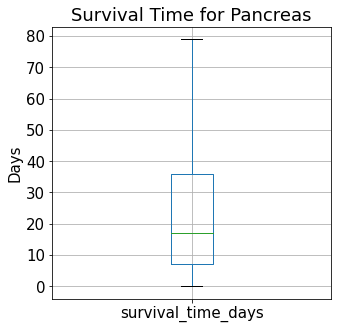

<Figure size 360x360 with 0 Axes>

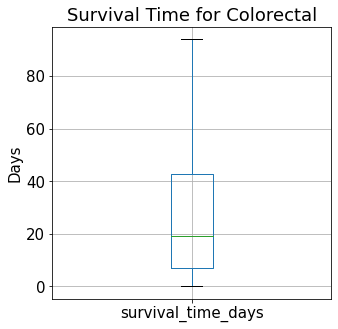

<Figure size 360x360 with 0 Axes>

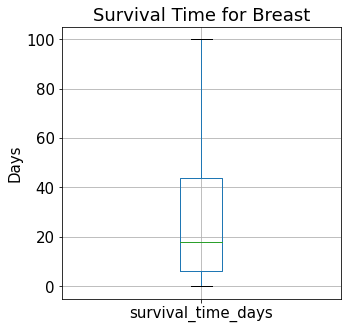

<Figure size 360x360 with 0 Axes>

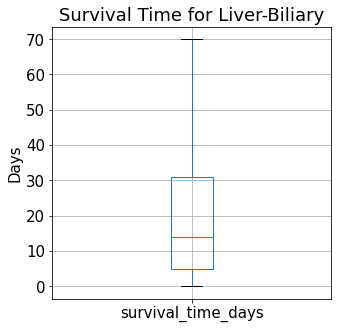

<Figure size 360x360 with 0 Axes>

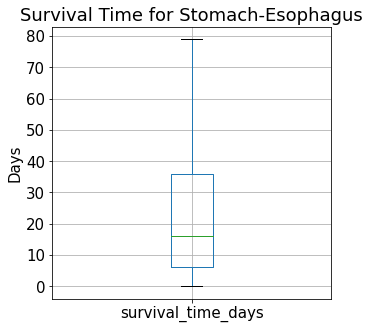

<Figure size 360x360 with 0 Axes>

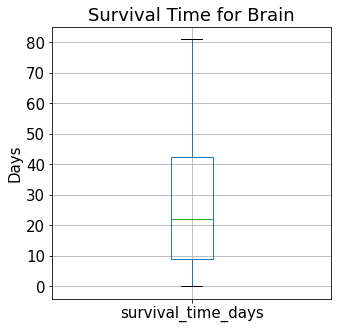

<Figure size 360x360 with 0 Axes>

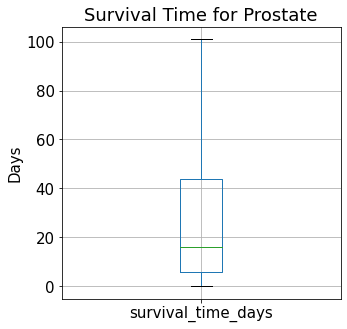

<Figure size 360x360 with 0 Axes>

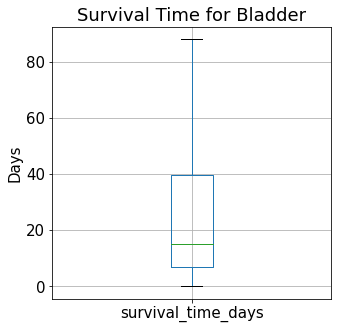

<Figure size 360x360 with 0 Axes>

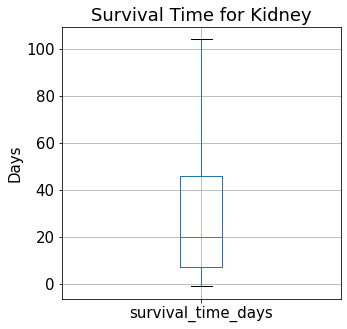

<Figure size 360x360 with 0 Axes>

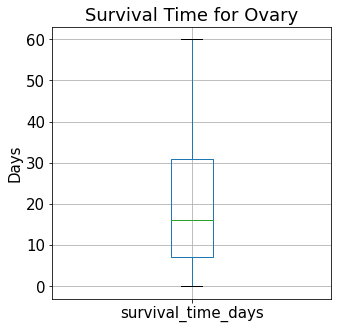

<Figure size 360x360 with 0 Axes>

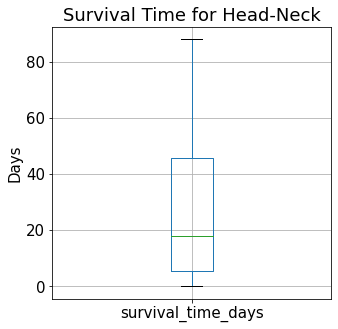

<Figure size 360x360 with 0 Axes>

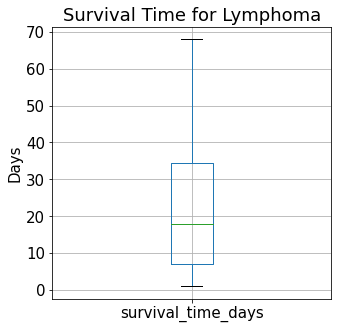

<Figure size 360x360 with 0 Axes>

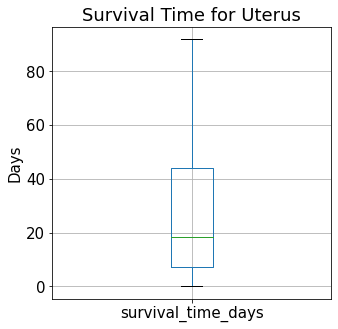

<Figure size 360x360 with 0 Axes>

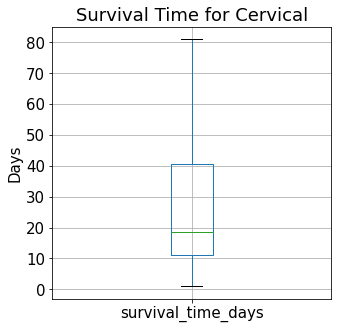

<Figure size 360x360 with 0 Axes>

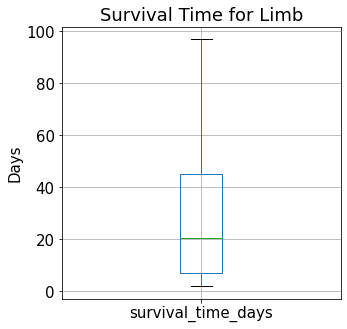

<Figure size 360x360 with 0 Axes>

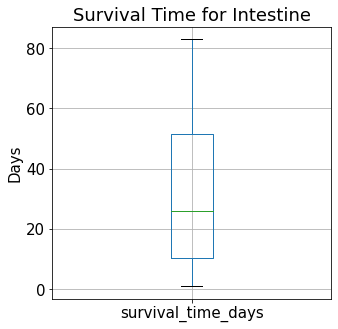

<Figure size 360x360 with 0 Axes>

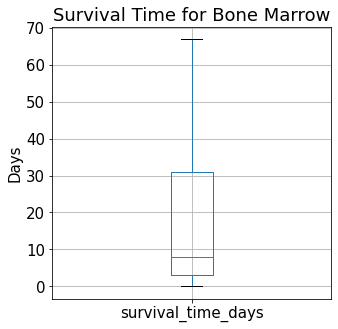

<Figure size 360x360 with 0 Axes>

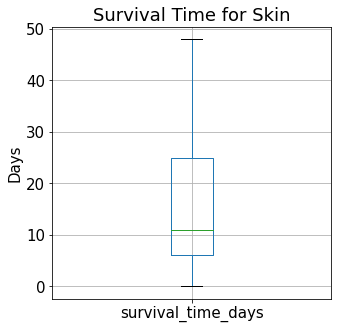

<Figure size 360x360 with 0 Axes>

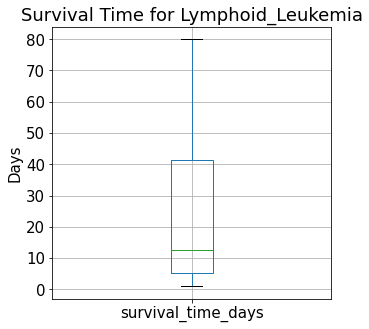

<Figure size 360x360 with 0 Axes>

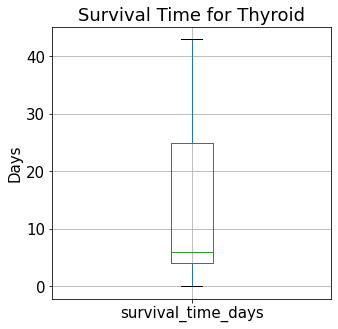

<Figure size 360x360 with 0 Axes>

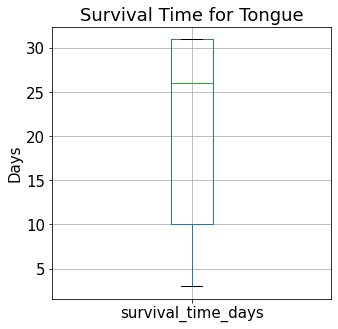

In [546]:
# boxplots for individual diagnosis
cancers = ['Lung', 'Other', 'Pancreas', 'Colorectal', 'Breast', 'Liver-Biliary',
       'Stomach-Esophagus', 'Brain', 'Prostate', 'Bladder', 'Kidney', 'Ovary',
       'Head-Neck', 'Lymphoma', 'Uterus', 'Cervical', 'Limb', 'Intestine',
       'Bone Marrow', 'Skin', 'Lymphoid_Leukemia', 'Thyroid', 'Tongue']

for cancer in cancers:
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.rcParams.update({'figure.max_open_warning': 0})
    df_temp = df_referral[df_referral['Diagnosis'] == cancer]
    plt.figure()
    fig, ax = plt.subplots()
    ax.set_ylabel('Days')
    ax.set_title('Survival Time for ' + cancer)
    df_temp.boxplot(column=['survival_time_days'], showfliers=False)

<Figure size 1440x1296 with 0 Axes>

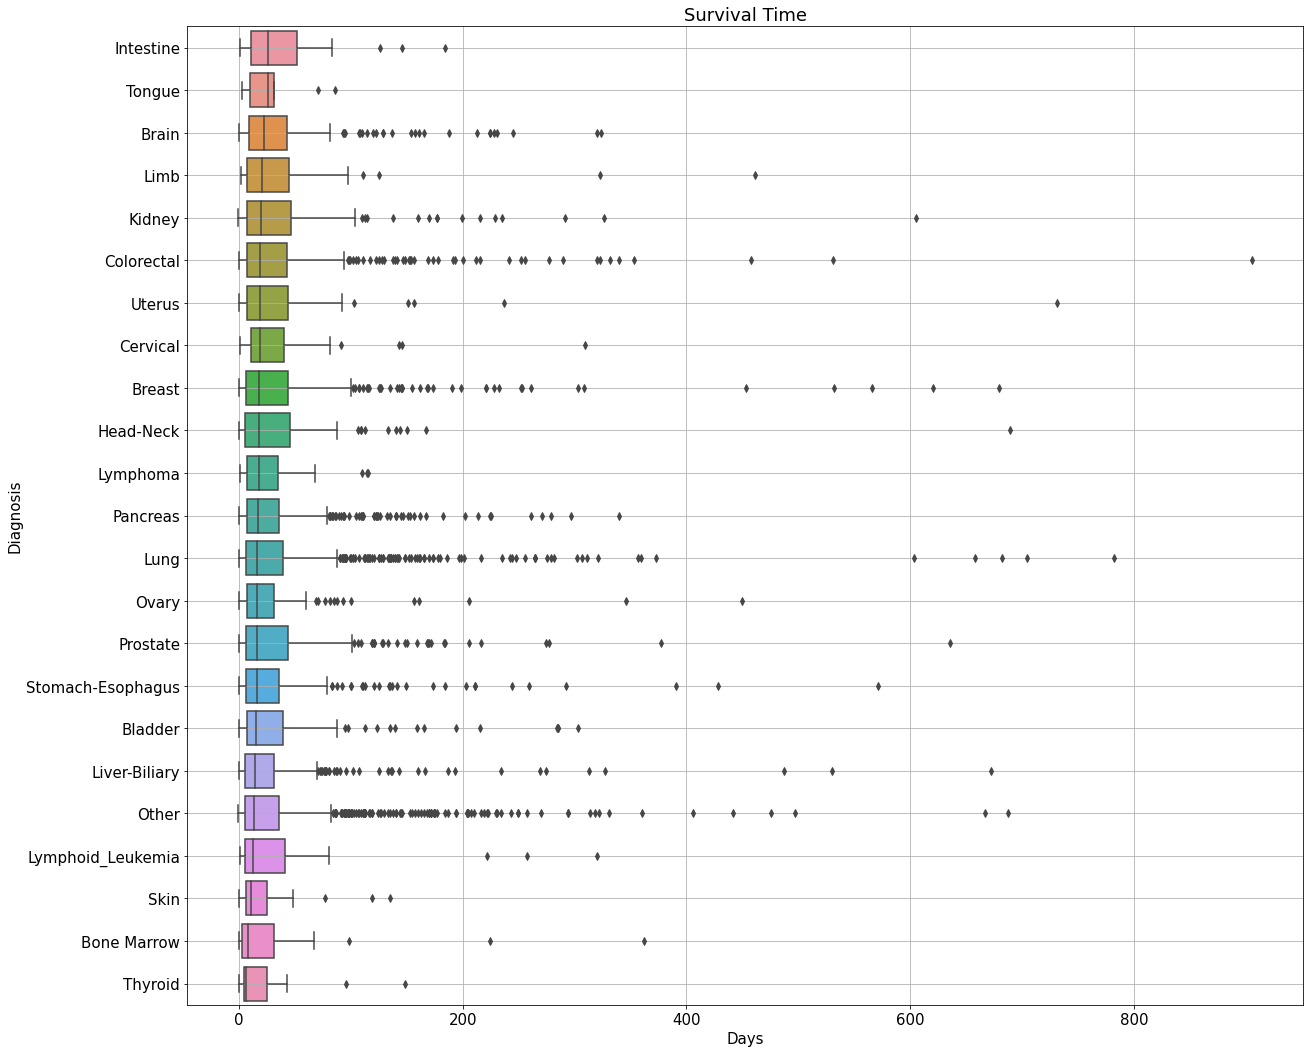

In [547]:
# boxplots for each disgnosis
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 18]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
diag_order = df_referral.groupby(by=['Diagnosis'])['survival_time_days'].median().sort_values(ascending=False).index
ax = sns.boxplot(x='survival_time_days', y='Diagnosis', data=df_referral, order=diag_order)
ax.set_xlabel('Days')
ax.set_ylabel('Diagnosis')
ax.set_title('Survival Time')
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time_box_plot_diagnosis.png")
plt.show()

In [548]:
df_referral.groupby(by=['Diagnosis'])['survival_time_days'].median().sort_values(ascending=False).index

Index(['Intestine', 'Tongue', 'Brain', 'Limb', 'Kidney', 'Colorectal',
       'Uterus', 'Cervical', 'Breast', 'Head-Neck', 'Lymphoma', 'Pancreas',
       'Lung', 'Ovary', 'Prostate', 'Stomach-Esophagus', 'Bladder',
       'Liver-Biliary', 'Other', 'Lymphoid_Leukemia', 'Skin', 'Bone Marrow',
       'Thyroid'],
      dtype='object', name='Diagnosis')

<Figure size 1440x1296 with 0 Axes>

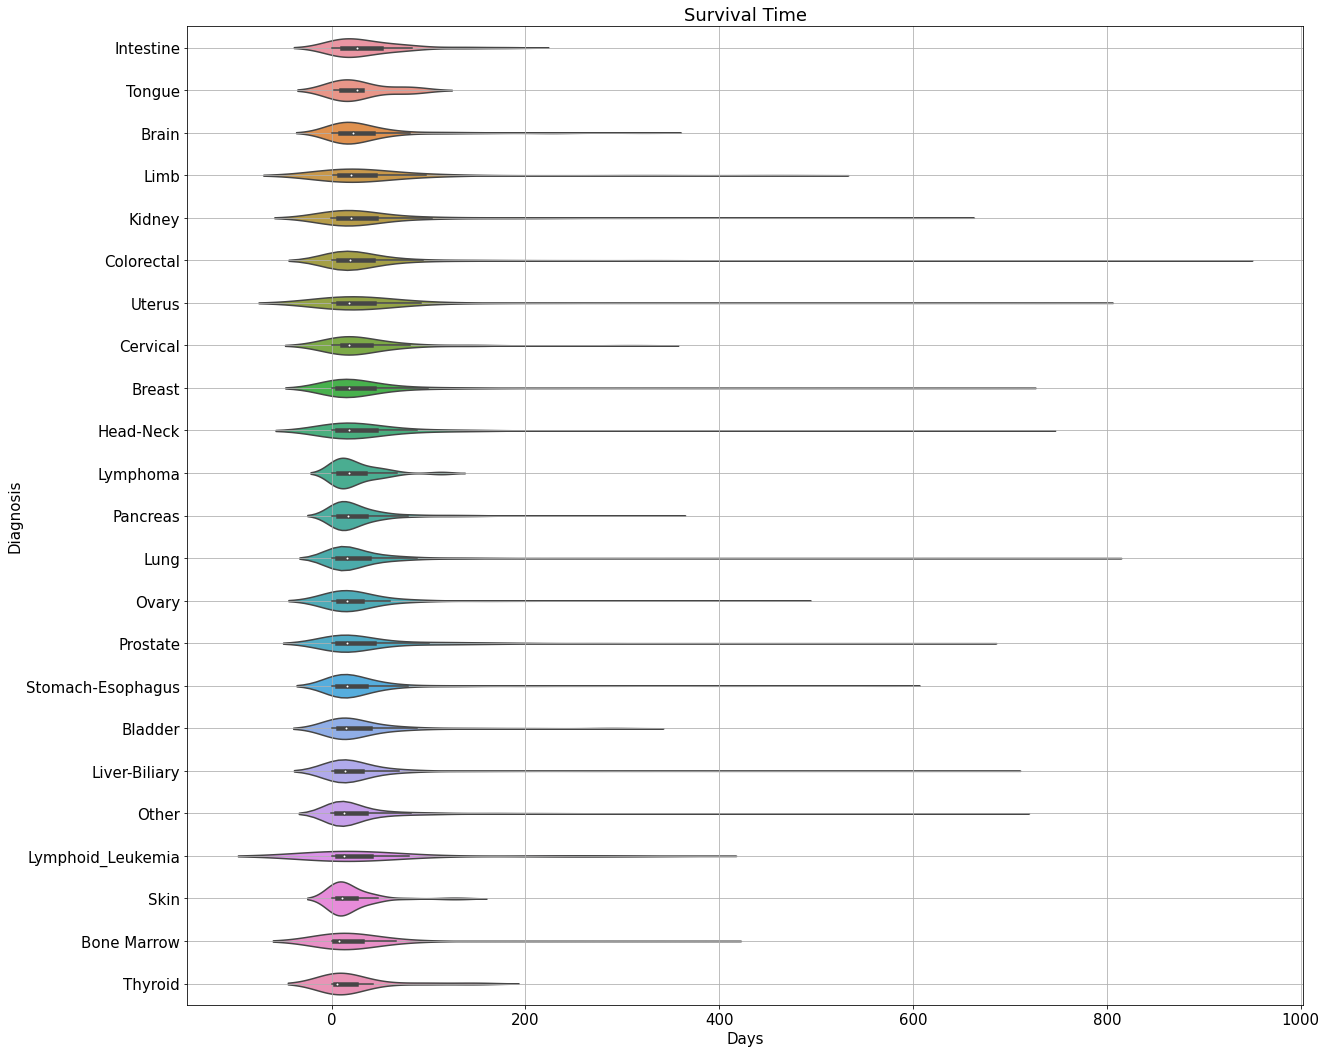

In [549]:
# Violin Plots
plt.rcParams['figure.figsize'] = [20, 18]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
diag_order = df_referral.groupby(by=['Diagnosis'])['survival_time_days'].median().sort_values(ascending=False).index
ax = sns.violinplot(x='survival_time_days', y='Diagnosis', data=df_referral, order=diag_order)
ax.set_xlabel('Days')
ax.set_ylabel('Diagnosis')
ax.set_title('Survival Time')
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time_violin_plot_diagnosis.png")
plt.show()

<Figure size 360x360 with 0 Axes>

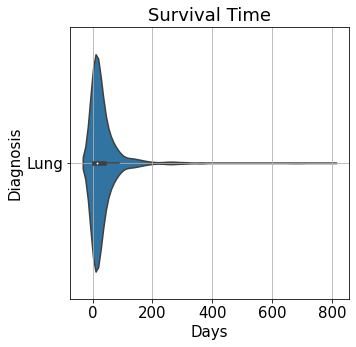

<Figure size 360x360 with 0 Axes>

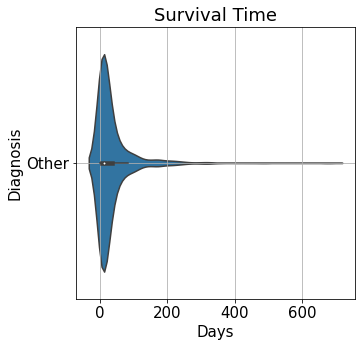

<Figure size 360x360 with 0 Axes>

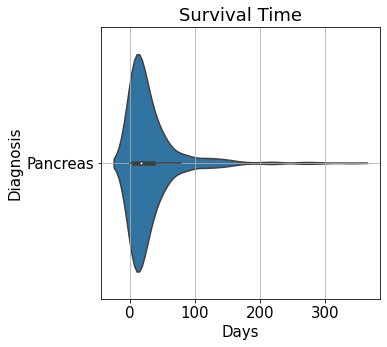

<Figure size 360x360 with 0 Axes>

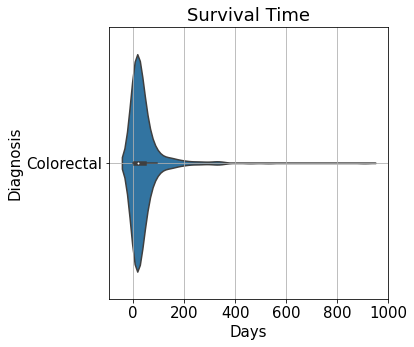

<Figure size 360x360 with 0 Axes>

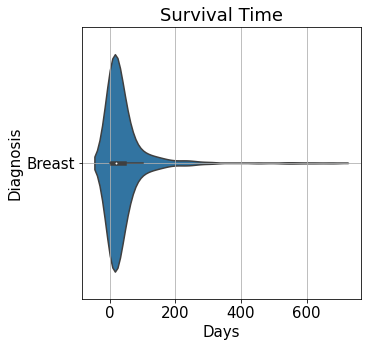

<Figure size 360x360 with 0 Axes>

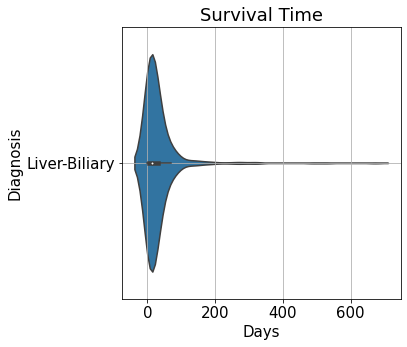

<Figure size 360x360 with 0 Axes>

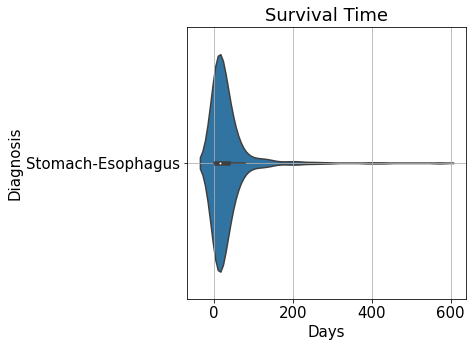

<Figure size 360x360 with 0 Axes>

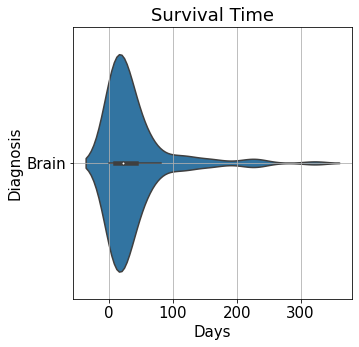

<Figure size 360x360 with 0 Axes>

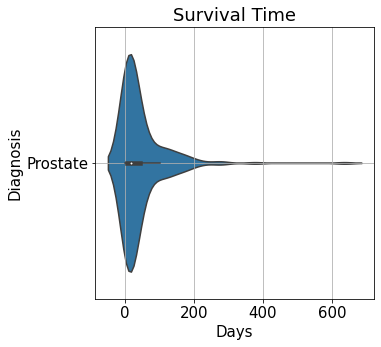

<Figure size 360x360 with 0 Axes>

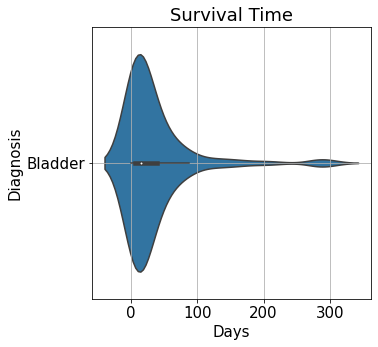

<Figure size 360x360 with 0 Axes>

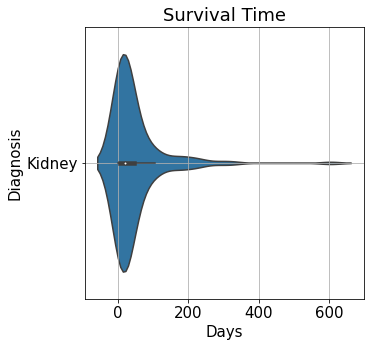

<Figure size 360x360 with 0 Axes>

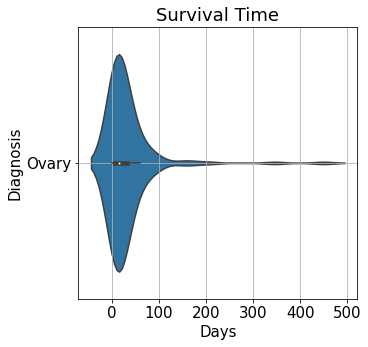

<Figure size 360x360 with 0 Axes>

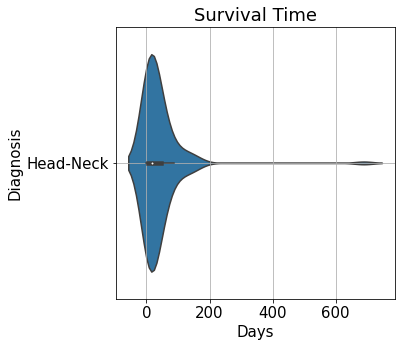

<Figure size 360x360 with 0 Axes>

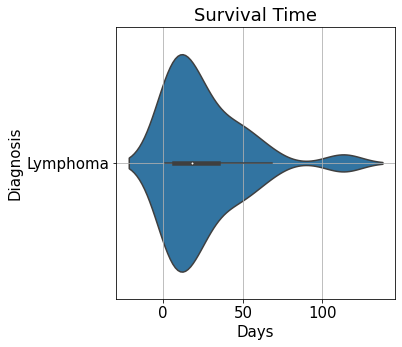

<Figure size 360x360 with 0 Axes>

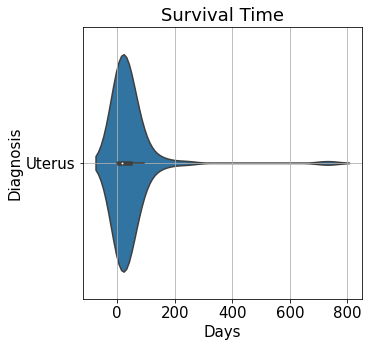

<Figure size 360x360 with 0 Axes>

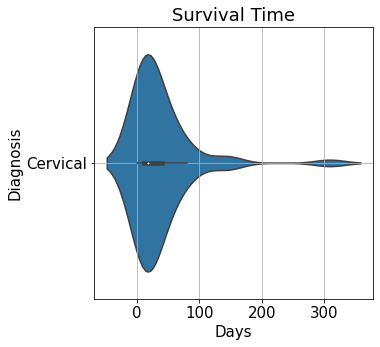

<Figure size 360x360 with 0 Axes>

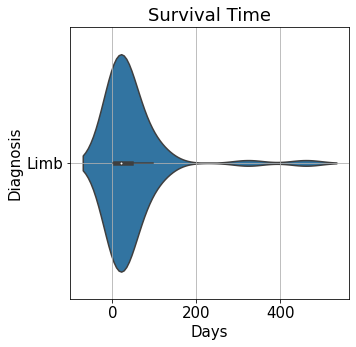

<Figure size 360x360 with 0 Axes>

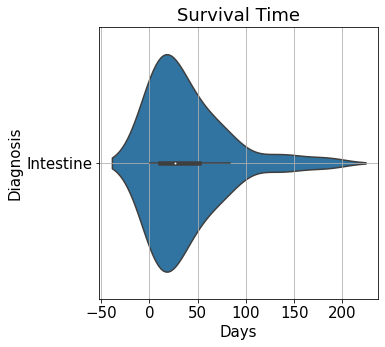

<Figure size 360x360 with 0 Axes>

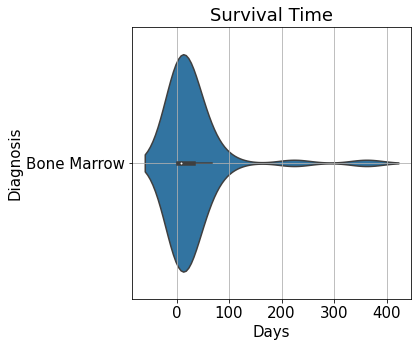

<Figure size 360x360 with 0 Axes>

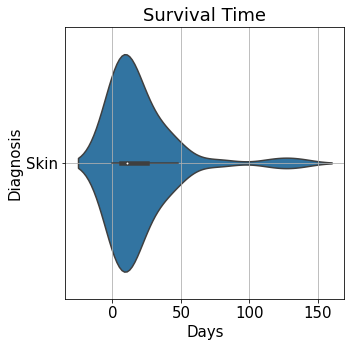

<Figure size 360x360 with 0 Axes>

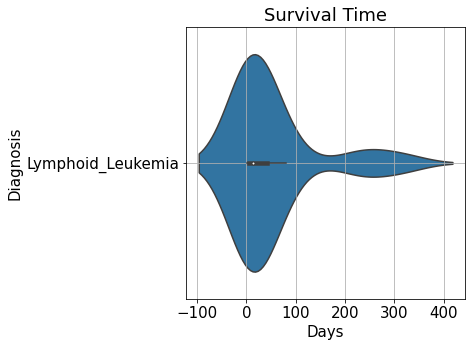

<Figure size 360x360 with 0 Axes>

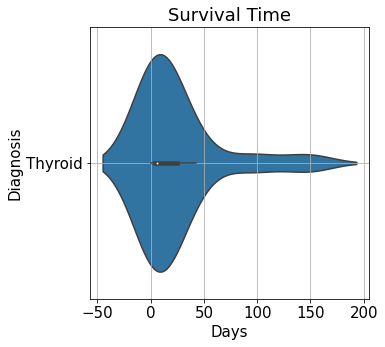

<Figure size 360x360 with 0 Axes>

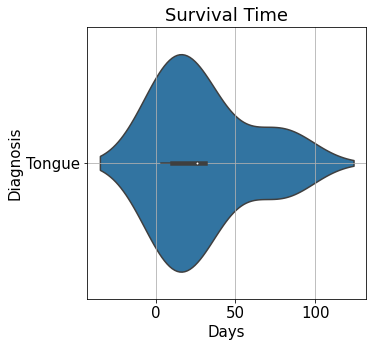

In [550]:
# Violin plot for individual diagnosis
cancers = ['Lung', 'Other', 'Pancreas', 'Colorectal', 'Breast', 'Liver-Biliary',
       'Stomach-Esophagus', 'Brain', 'Prostate', 'Bladder', 'Kidney', 'Ovary',
       'Head-Neck', 'Lymphoma', 'Uterus', 'Cervical', 'Limb', 'Intestine',
       'Bone Marrow', 'Skin', 'Lymphoid_Leukemia', 'Thyroid', 'Tongue']

for cancer in cancers:
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.rcParams.update({'figure.max_open_warning': 0})
    df_temp = df_referral[df_referral['Diagnosis'] == cancer]
    plt.figure()
    fig, ax = plt.subplots()
    ax = sns.violinplot(x='survival_time_days', y='Diagnosis', data=df_temp)
    ax.set_xlabel('Days')
    ax.set_ylabel('Diagnosis')
    ax.set_title('Survival Time')
    plt.grid()
    plt.show()

<Figure size 1440x648 with 0 Axes>

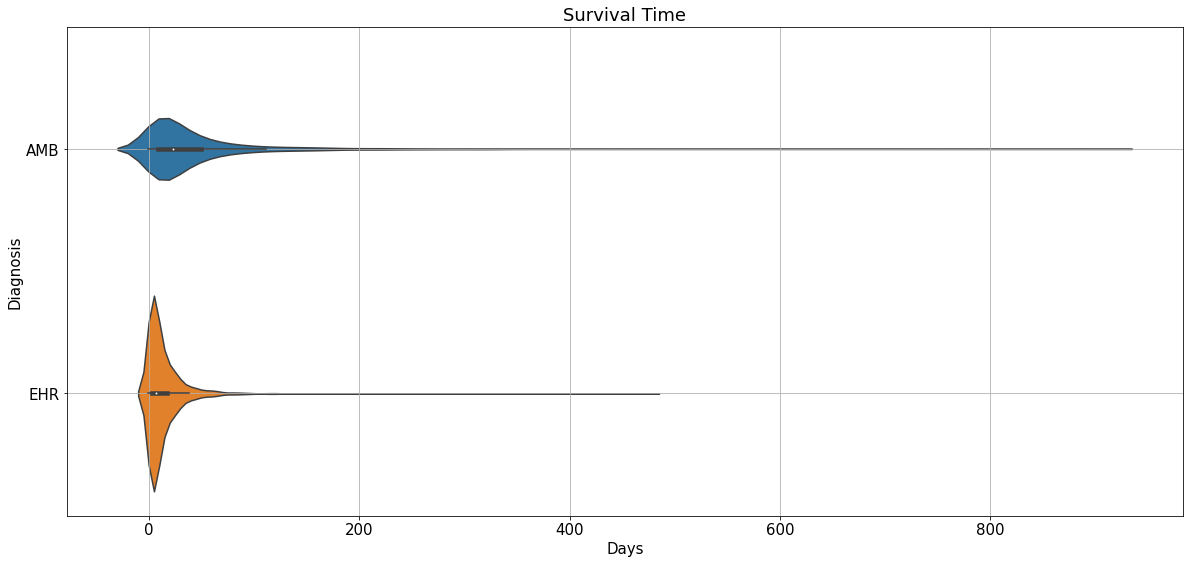

In [551]:
# AMB vs EHR survival time
plt.rcParams['figure.figsize'] = [20, 9]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
diag_order = df_referral.groupby(by=['EHRType'])['survival_time_days'].median().sort_values(ascending=False).index
ax = sns.violinplot(x='survival_time_days', y='EHRType', data=df_referral, order=diag_order)
ax.set_xlabel('Days')
ax.set_ylabel('Diagnosis')
ax.set_title('Survival Time')
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time_violin_plot_EHRType.png")
plt.show()

In [552]:
df_referral.to_csv('./vidas_data/survival_time.csv')

In [553]:
# First Definition: Split patients into early/late referral by using the criteria of +- 2 stddev for each diagnosis
